# Analysing Spoofed files in dev set - version 2.0 dataset

## TODO

 * Draw scatter plot of posteriors for our best CNN system to project the distribution of genuine and spoofed features
 * Do this for Development and evaluation set.
 * On Evaluation set you could do this plot seperately for different Replay configurations (total 57 will be too much though)

# Summary of file list for spoofed and genuine files in Development set for analysis

## 1) The top 10 spoofed confident correctly classified files : high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    837 1.53546e-06 0.999998 -13.3867
    787 2.66796e-06 0.999997 -12.8342
    818 3.13078e-06 0.999997 -12.6742
    774 4.71425e-06 0.999995 -12.2649
    263 5.44733e-06 0.999995 -12.1204
    882 6.76732e-06 0.999993 -11.9034
    807 7.06049e-06 0.999993 -11.861
    786 8.35866e-06 0.999992 -11.6922
    248 8.47951e-06 0.999992 -11.6778
    819 8.50818e-06 0.999992 -11.6745
                              



In [390]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [391]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run8/predictions/dev_prediction.txt'

In [392]:
all_predictions = []
all_gens = []
all_spoofs = []

with open(pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:760]                    # first 760 files in dev are genuine
all_spf_predictions = all_predictions[760:]                  # files from 761-1710 are spoofed examples

In [393]:
all_scores = []

with open(pred_file) as f:
    all_scores = [line.strip().split(' ')[2] for line in f]
    
all_gen_scores = all_scores[:760]
all_spf_scores = all_scores[760:]

In [394]:
print(len(all_gen_scores))
print(len(all_spf_scores))

760
950


In [395]:
print(all_spf_scores[0:10])

['-4.07604', '-8.03727', '-4.36948', '-4.70375', '-1.91081', '-0.697803', '1.95232', '-3.31911', '-1.7775', '-0.200272']


## Prepare file-list for top spoofed files

In [396]:
# We select all those spoofed files that got spoofed probability > 90% (We gave selection criterion score<-0.3). 
# Print the results, its fine for now. 

fname='index_file_list/allSpoofIndexList_TP.txt'
f=open(fname,'w')

spfFileList = list()
count=0

for i in spf_sort_index:
    score= all_spf_predictions[i].strip().split(' ')[2]
    if float(score) < -3.0:    #-10.0:
        spfFileList.append(str(i) + ' ' + str(all_spf_predictions[i]))
        count += 1
print('Total count = ',count)

# Reverse sort the list- so that spoofed files with highest spoof probability are on top
sorted_spfList = spfFileList[::-1]
for line in sorted_spfList:
    f.write(line+'\n')
    #print(line)
f.close()


Total count =  655


In [397]:
%%bash
cat index_file_list/allSpoofIndexList_TP.txt | head

406 4.73483e-05 0.999953 -9.95793
825 4.87546e-05 0.999951 -9.92866
891 5.13633e-05 0.999949 -9.87653
453 5.33837e-05 0.999947 -9.83795
881 5.36915e-05 0.999946 -9.8322
534 5.412e-05 0.999946 -9.82425
533 5.59461e-05 0.999944 -9.79107
284 6.28036e-05 0.999937 -9.67544
723 6.31056e-05 0.999937 -9.67064
438 6.3409e-05 0.999937 -9.66584


***Point***
> We select all those spoofed files that got spoofed probability > 90%. We have 655 spoofed files that we can use SLIME to get a reliable estimate for what the CNN might have learned about the spoofed class. Note that when running slime, for many files the SLIME returns no explanation coz we are only returning positive instance explanation. Thus we remove those files.

> Therefore, these spoofed files have been classified with > 90% probability of being spoofed

## 1) Printing few top spoofed confident correctly classified files - high scores

    Gen prob     Spf Prob      Log Liklihood ratio
    837 1.53546e-06 0.999998 -13.3867
    787 2.66796e-06 0.999997 -12.8342
    818 3.13078e-06 0.999997 -12.6742
    774 4.71425e-06 0.999995 -12.2649
    263 5.44733e-06 0.999995 -12.1204
    882 6.76732e-06 0.999993 -11.9034
    807 7.06049e-06 0.999993 -11.861
    786 8.35866e-06 0.999992 -11.6922
    248 8.47951e-06 0.999992 -11.6778
    819 8.50818e-06 0.999992 -11.6745
    854 8.9333e-06 0.999991 -11.6257
    249 1.16861e-05 0.999988 -11.3571
    817 1.21676e-05 0.999988 -11.3167
    262 1.45125e-05 0.999985 -11.1405
    216 1.61832e-05 0.999984 -11.0315
    204 1.71234e-05 0.999983 -10.975
    191 1.7362e-05 0.999983 -10.9612
    914 1.7689e-05 0.999982 -10.9425
    795 1.81139e-05 0.999982 -10.9188
    794 1.90792e-05 0.999981 -10.8669
    846 1.96264e-05 0.99998 -10.8386
    242 2.11725e-05 0.999979 -10.7628
    796 2.13798e-05 0.999979 -10.753
    832 2.29622e-05 0.999977 -10.6816
    407 2.31936e-05 0.999977 -10.6716
    821 2.4279e-05 0.999976 -10.6259
    692 2.47647e-05 0.999975 -10.6061
    833 2.54092e-05 0.999975 -10.5804
    237 2.59756e-05 0.999974 -10.5583
    761 2.66067e-05 0.999973 -10.5343
    913 3.04757e-05 0.999969 -10.3986
    809 3.80521e-05 0.999962 -10.1765
    941 3.98409e-05 0.99996 -10.1306
    751 4.05992e-05 0.999959 -10.1117
    778 4.14434e-05 0.999959 -10.0911
    823 4.48039e-05 0.999955 -10.0132

## Analysing Time: The top two components from SLIME - True positive Spoofed case

Note, that under time analysis, we have cut our input spectrogram into 10 different temporal components/segments, where each segment correpsonds to

> ***300 mili seconds***

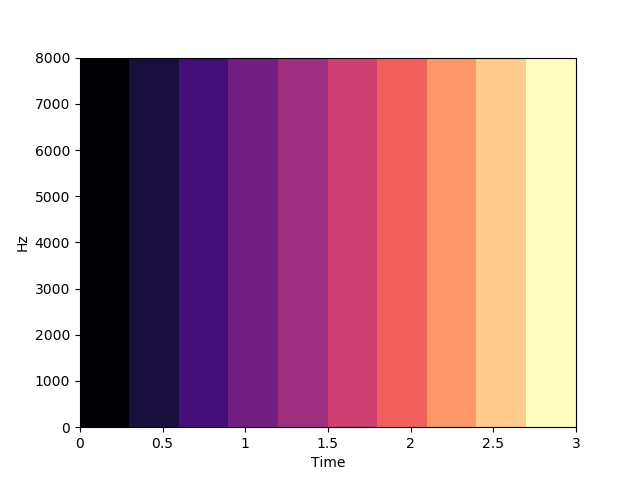

In [398]:
# Show how we cut the spectrogram in timexfrequency

Image("time.png")

In [399]:
file = 'top_two_explanation_indices/time/spoof_TP.txt'

In [400]:
%%bash
cat top_two_explanation_indices/time/spoof_TP.txt  | head

0 -999
1 5
5 6
0 1
5 2
0 -999
0 -999
7 8
1 -999
0 -999


In [401]:
def get_top1_top2_list(file):
    with open(file) as f:
        top1 = [int(line.strip().split(' ')[0]) for line in f]
    with open(file) as f:  
        top2 = [int(line.strip().split(' ')[1]) for line in f]
    return top1, top2    

In [402]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [403]:
print(len(top1))
print(len(top2))

452
452


In [404]:
def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

In [405]:
def print_component_distribution(comps, predList, order):
    print('Printing component weigting distribution for Top:', order)
    for i in comps:
        print('Component ' + str(i) + ' : ' + str(get_counts(predList, i)))    

### Using the top1 components - given by SLIME (Time segmentation)

> For ***run1*** we get following distribution:

    

In [406]:
comps=[0,1,2,3,4,5,6,7,8,9]    # In time we have 10 segments/components

In [407]:
# Print distribution on top1
order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 234
Component 1 : 63
Component 2 : 12
Component 3 : 3
Component 4 : 9
Component 5 : 12
Component 6 : 34
Component 7 : 68
Component 8 : 17
Component 9 : 0


*** Observation ***
> Top1 predictions favours the **first 300ms**. We get 234 votes from slime, which is heavily dominating other components as seen above.

### Using the top2 components - given by SLIME (Time segmentation)

> For ***Run1*** we get following distribution


In [408]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 18
Component 1 : 69
Component 2 : 11
Component 3 : 2
Component 4 : 12
Component 5 : 12
Component 6 : 38
Component 7 : 44
Component 8 : 21
Component 9 : 4


*** Observation***
> Top2 gives highest favour for component 2 (69) that corresponds to 600ms. 

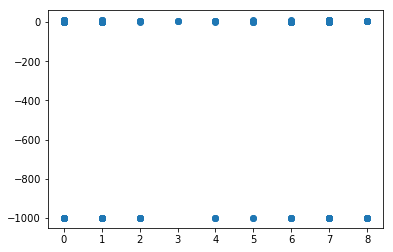

In [409]:
# Just a quick scatter plot

plt.scatter(top1, top2)

In [410]:
# Get those file index having component4 in top explanation

fname='index_file_list/allSpoofIndexList_TP.txt'
with open(fname) as f:
    file_idxs = [line.strip() for line in f]  
    
# Write the top component index to the file and further analysis

fname='top_two_explanation_indices/time/topExplanation_list_spoof_TP.txt'
id4_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==3:    # if top explanation index is 3 (which is actually 4)
        id4_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

### Note: 
> the file topExplanation_list_spoof_TP.txt will have four columns
> The first column denotes file index (index from 0), second and third specifies genuine and spoofed probability, while last specifies the LLR score

### What have we done so far

 1. We took all spoofed files that were correctly classified by CNN. We took files for which spoofed probability is greater than 90% and get 655 files.
 1. Then we applied SLIME. We segmented along time. We partitioned these files in 10 parts, each of 300ms. We then obtained top 2 influencing component index.
 1. We then analysed the explanation index distribution for these 766 files and find that the component 4 

## Analysing Freq: The top two components from SLIME - True positive Spoofed

Note, that under frequency analysis, we have cut our input spectrogram into 8 different frequency components/segments, where each segment correpsonds to

> ***1000 Hz frequency***

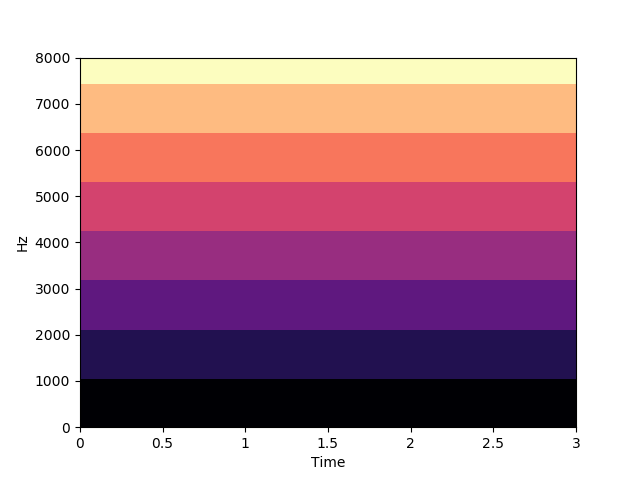

In [411]:
# Show how we cut the spectrogram in timexfrequency

Image("frequency.png")

In [412]:
file = 'top_two_explanation_indices/freq/spoof_TP.txt'

In [413]:
%%bash
cat 'top_two_explanation_indices/freq/spoof_TP.txt' | head

# the top two components 7 6 dominates the explanation

0 5
6 1
6 3
0 5
6 5
5 1
0 3
3 0
0 5
6 1


In [414]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [415]:
# Top 2 may have -999 that we added when running SLIME. Remove those files in top2

In [416]:
print(len(top1))
print(len(top2))

628
628


## Top 1 component distribution - Frequency

In [417]:
comps = [0,1,2,3,4,5,6,7]   # in Frequency we have 8 components

In [418]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 113
Component 1 : 30
Component 2 : 6
Component 3 : 128
Component 4 : 6
Component 5 : 46
Component 6 : 299
Component 7 : 0


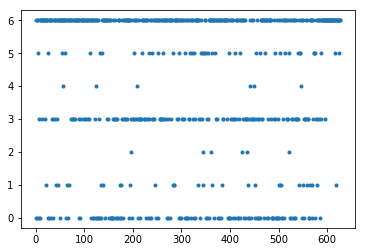

In [419]:
# Plot the distribution
plt.plot(top1,'.')

***Observation***
> We see that under frequency analysis, the top explanation appears to be favouring frequency bin 7000Hz. The next two frequency information that influences are 4000Hz and 1000Hz.

***Out of total 655 spoofed files***
 1. 299 belongs to 7000Hz
 1. 128 for 4000 Hz
 1. 113 for 1000 Hz


## Top 2 component distribution - Frequency

In [420]:
# Print distribution on top2
top2 = [value for value in top2 if value > 0]     # make sure to remove those -999 instances from top2
order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 0
Component 1 : 155
Component 2 : 22
Component 3 : 161
Component 4 : 26
Component 5 : 41
Component 6 : 26
Component 7 : 0


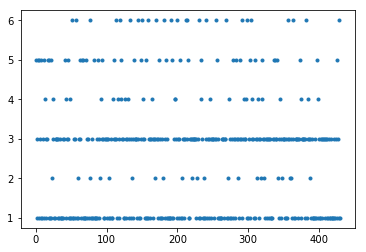

In [421]:
# Plot the top2 distribution
plt.plot(top2,'.')

**NOTE: **
> In SLIME code, as I was returning two indices, for spoofed files SLIME was only returning positive index, which in many cases was only one, therefore, I put -999 as the second value (just not to break the code and make changes)

##### So above -1000 line shown is to be just ignored !!

In [422]:
# Get those file index having component8 in top explanation (as for frequency we get top explanation at index8)

top = 6   # Define this value for each case of analysis

fname='index_file_list/allSpoofIndexList_TP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
#Write the top component index to the file and further analysis
fname='top_two_explanation_indices/freq/topExplanation_list_spoof_TP.txt'
id8_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==top:    # if top explanation index is 3 (which is actually 4)
        id8_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

** Observations**


> What has the CNN learned about the genuine and spoofed classes?


## Analysing timexFreq: The top two components from SLIME - True positive Spoofed case

Note, that under timexfrequency analysis, we have cut our input spectrogram into 30 different segments, where each segment correpsonds to

> ***600 msec in time and around 1333 Hz in frequency***

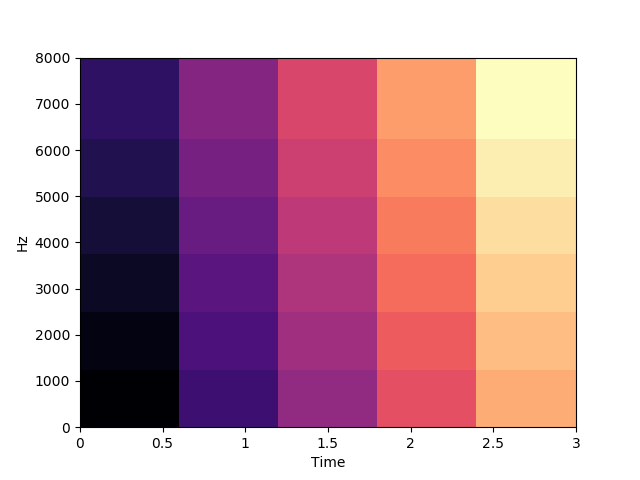

In [423]:
# Show how we cut the spectrogram in timexfrequency

Image("timexfrequency.png")

In [424]:
file = 'top_two_explanation_indices/tf/spoof_TP.txt'

In [425]:
%%bash
cat 'top_two_explanation_indices/tf/spoof_TP.txt' | grep 0 | wc -l
#cat 'top_two_explanation_indices/tf/spoof_TP.txt' 

# the indexes 11,23 and 17 seems to be appearing mostly
# Index 11 occuring - 498 times (in top2)
# Index 23 occurs 204 times in top2 pair
# Index 17 appears 394 times in top2 pair

#16,28,17,9,29,5,23,20,0,18,1

# Component 16 appears 99 times
# Component 28 appears 12 times
# Component 17 appears 19 times
# Component 9 appears 77 times
# Component 29 appears 55 times
# Component 5 appears 300 times
# Component 23 appears 102 times
# Component 20 appears 21 times
# Component 0 appears 208 times

# Note grep looks all appearances. This cound indicates both first and second

208


#### quick note

>  Along timexfrequency analysis

 1. Component 16 appears 99 times
 2. Component 28 appears 12 times
 3. Component 17 appears 19 times
 4. Component 9 appears 77 times
 5. Component 29 appears 55 times
 6. Component 5 appears 300 times
 7. Component 23 appears 102 times
 8. Component 20 appears 21 times
 9. Component 0 appears 208 times

Note grep looks all appearances. This cound indicates both first and second

** Note ** Indexes starts with 0, so 11 here is 12th component 

In [426]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)
print(len(top1))
print(len(top2))

655
655


## Top 1 component distribution - time x Frequency

In [427]:
comps = np.arange(0,30)   # in timexfrequency we have 30 components

In [428]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 23
Component 1 : 63
Component 2 : 4
Component 3 : 5
Component 4 : 10
Component 5 : 180
Component 6 : 0
Component 7 : 1
Component 8 : 35
Component 9 : 7
Component 10 : 111
Component 11 : 0
Component 12 : 0
Component 13 : 1
Component 14 : 2
Component 15 : 0
Component 16 : 53
Component 17 : 7
Component 18 : 25
Component 19 : 0
Component 20 : 6
Component 21 : 9
Component 22 : 7
Component 23 : 56
Component 24 : 6
Component 25 : 30
Component 26 : 0
Component 27 : 0
Component 28 : 2
Component 29 : 12


*** Observation ***
> Distribution shows highest for Component 5 (180), next for component 10(111), next 1(63) as shown about. This distribution is out of 655 spoofed audio files that were classified with probability greater than 90% as spoofed by the CNN.

## Top 2 component distribution - time x Frequency

In [429]:
# Print distribution on top2

order = 2
print_component_distribution(comps, top2, order)

Printing component weigting distribution for Top: 2
Component 0 : 19
Component 1 : 83
Component 2 : 16
Component 3 : 4
Component 4 : 23
Component 5 : 74
Component 6 : 1
Component 7 : 0
Component 8 : 43
Component 9 : 14
Component 10 : 42
Component 11 : 7
Component 12 : 5
Component 13 : 4
Component 14 : 14
Component 15 : 3
Component 16 : 46
Component 17 : 12
Component 18 : 52
Component 19 : 1
Component 20 : 15
Component 21 : 21
Component 22 : 14
Component 23 : 46
Component 24 : 10
Component 25 : 31
Component 26 : 2
Component 27 : 0
Component 28 : 10
Component 29 : 43


**Observations**

> Under top2, we find component 1 as highest (83)

# Overall Summary from this study (considering only top1 explanation)

**Time segmentation**

>We segmented spectrogram into 10 super-samples (components), each of 1000ms, and ran SLIME to generate explanations using 5000 samples. We find that among 655 True-positive spoofed files (with probability > 90%), the highest influence is shown for **component 0** that corresponds to **first 300ms**. We get 234 votes from slime.


**Frequency segmentation**
> We segmented the spectrograms into 8 different frequency bins, each corresponding to 1000Hz and ran SLIME. In this case, we see that the top explanation appears to be favouring frequency bin 7000Hz. The next two frequency information that influences are 4000Hz and 1000Hz.


> ***NOTE: In genuine case we got highest vote for 8000Hz bin***

**TimexFrequency segmentation**
> We segmented the spectrogram into 30 different timexfrequency bins. We chose 30 to keep our analysis simple. Each component corresponds to 600 msec in time and around 1333 Hz in frequency. 

> Here, the distribution shows highest for **Component 5 (180)** followed by **component 10(111)**. This distribution is out of 655 spoofed audio files that were classified with probability greater than 90% as spoofed by the CNN.

** Correlation between time,frequency and timexfrequency analysis**

> Under time analysis we found that the model is highly influenced for first 300ms signal. This relates to the fact that the model seem to exploit information related to DTMF tone that was used for concatenating the original RedDots genuine signal to create spoofed counterparts. SLIME seems to explain this very fact, as we find 234 votes for the spoofed signals with probability greater than 90%. We may still want to double check this fact by just taking the spoofed files with highest probability !

> Next interesting observation we find is by doing frequency analysis, we see that spoofed class is looking at the high frequency regions mostly. Frequency component 7000 Hz seems to take the lead, this is followed by 4000Hz frequency bin. This means that spoofed class in not heavily relying on speech signal. Need to double check and add further analysis for significant conclusion.

> Further, having done time-frequency analysis together we find component 5 to give highest count. This corresponds to first 6000ms in time and 7998 Hz (1333*6) frequency.


 